In [5]:
!pip install secret

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 70.9 MB/s eta 0:00:00 0:00:01
  Created wheel for secret: filename=secret-0.8-py3-none-any.whl size=9100 sha256=72ea2d1167ec72a5a472ee47c15787d90cacbab16c8efd66eecd44102a366edc
  Stored in directory: /private/var/folders/g3/335n2xh11k5cchd768_t56_c0000gn/T/pip-ephem-wheel-cache-f04h0ou4/wheels/58/aa/49/392eef7d8ce149344fbacfeebff380a525cdd552d18c88ee8d
Successfully built secret
You should consider upgrading via the '/Users/yagevlevi/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
import sys
sys.path.append('/Users/yagevlevi/miniforge3/envs/spark-env/lib/python3.8/site-packages')
sys.path.append('/Users/yagevlevi/anaconda3/lib/python3.9/site-packages')
import pandas as pd
import numpy as np
from entity_recognition import get_locations

In [2]:
df = pd.read_csv('search-result-2022-11-08-04-04-19(1).csv')
df = df[['Type', 'Label', 'Headline', 'Body', 'Byline', 'Publish Date']]

df.head()

,Type,Label,Headline,Body,Byline,Publish Date
0,Article,Watertown Police Detective Alleges Hostile Wor...,Watertown Police Detective Alleges Hostile Wor...,BOSTON (AP) — A Watertown police detective all...,Associated Press,Wed Nov 18 14:39:02 EST 2020
1,Article,"In 2020, Larissa FastHorse's 'The Thanksgiving...","In 2020, Larissa FastHorse's 'The Thanksgiving...","In late October, Native American playwright <a...",Jill Kaufman,Fri Nov 20 16:34:53 EST 2020
2,Article,In From The Cold: Martha’s Vineyard To Open It...,In From The Cold: Martha’s Vineyard To Open It...,"For the past five winters, three Martha’s Vine...",Jennette Barnes,Tue Nov 24 15:48:23 EST 2020
3,Article,Retail Behemoth Amazon May Be Coming To The Si...,Retail Behemoth Amazon May Be Coming To The Si...,A site plan filed with the city of Worcester’s...,Aaron Schachter,Fri Nov 27 15:11:17 EST 2020
4,Article,Rollins Talking Criminal Justice With Biden Team,Rollins Talking Criminal Justice With Biden Team,While she said &quot;right now I&#39;m stickin...,Michael P. Norton | State House News Service,Mon Nov 30 08:49:08 EST 2020


In [3]:
df['combined_text'] = df.Label + df.Headline + df.Body
df['locations'] = df.apply(lambda row: get_locations(row.combined_text, ['LOC', 'ORG']), axis = 1)

df.head()

,Type,Label,Headline,Body,Byline,Publish Date,combined_text,locations
0,Article,Watertown Police Detective Alleges Hostile Wor...,Watertown Police Detective Alleges Hostile Wor...,BOSTON (AP) — A Watertown police detective all...,Associated Press,Wed Nov 18 14:39:02 EST 2020,Watertown Police Detective Alleges Hostile Wor...,"{(the Watertown Police Department, ORG), (Hera..."
1,Article,"In 2020, Larissa FastHorse's 'The Thanksgiving...","In 2020, Larissa FastHorse's 'The Thanksgiving...","In late October, Native American playwright <a...",Jill Kaufman,Fri Nov 20 16:34:53 EST 2020,"In 2020, Larissa FastHorse's 'The Thanksgiving...","{(it&#39;s, ORG), (WAM, ORG), (Kingston, ORG),..."
2,Article,In From The Cold: Martha’s Vineyard To Open It...,In From The Cold: Martha’s Vineyard To Open It...,"For the past five winters, three Martha’s Vine...",Jennette Barnes,Tue Nov 24 15:48:23 EST 2020,In From The Cold: Martha’s Vineyard To Open It...,"{(it&#39;s, ORG), (the Old Whaling Church.<br/..."
3,Article,Retail Behemoth Amazon May Be Coming To The Si...,Retail Behemoth Amazon May Be Coming To The Si...,A site plan filed with the city of Worcester’s...,Aaron Schachter,Fri Nov 27 15:11:17 EST 2020,Retail Behemoth Amazon May Be Coming To The Si...,"{(Retail Behemoth, ORG), (Amazon, ORG), (Behem..."
4,Article,Rollins Talking Criminal Justice With Biden Team,Rollins Talking Criminal Justice With Biden Team,While she said &quot;right now I&#39;m stickin...,Michael P. Norton | State House News Service,Mon Nov 30 08:49:08 EST 2020,Rollins Talking Criminal Justice With Biden Te...,"{(she&#39;s watching &quot;very, ORG), (CBS Bo..."


In [4]:
df.to_csv('data_with_locations.csv')

In [35]:
#df = pd.read_csv('data_with_locations.csv')

In [21]:
def extract_locations(locations : pd.Series, type_of_loc : str) -> pd.DataFrame:
    col_name1 = type_of_loc + '_location'
    col_name2 = type_of_loc + '_count'
    df = pd.DataFrame(columns = [col_name1, col_name2])
    
    for loc in locations:
        for val, typ in loc:
            if typ == type_of_loc:
                if val.lower() not in df[col_name1].values:
                    new = {col_name1: val.lower(), col_name2: 1}
                    df = df.append(new, ignore_index = True)
                else:
                    idx = df.index[df[col_name1] == val.lower()]
                    df[col_name2].iloc[idx] += 1
    
    return df

In [22]:
import warnings
warnings.filterwarnings("ignore")

loc_df = extract_locations(df['locations'], 'LOC')

org_df = extract_locations(df['locations'], 'ORG')

new_df = result = pd.concat([loc_df, org_df], axis=1)

new_df.head()

,LOC_location,LOC_count,ORG_location,ORG_count
0,the mahicantuck river valley area,1,the watertown police department,1
1,the hudson river valley,1,herald,1
2,vineyard,3,donohue,1
3,new england,23,ap,32
4,the bay state,1,the boston herald,1


In [24]:
def prune_locations(df : pd.DataFrame, type_of_loc : str) -> list:
    invalid_chars = ['.', '/', '>', '<', '!', '?', '#', ';', ':', '1', '2', '3', '4', '5', '6', '7', 
                     '8', '9', '0', '(', ')']
    idxs = []
    for i in range(len(df)):
        try:
            loc = df[type_of_loc + '_location'].iloc[i]
            for c in invalid_chars:
                if c in loc:
                    idxs.append(i)
        except:
            idxs.append(i)
            
    return idxs

print(len(new_df))

loc_idxs = prune_locations(new_df, 'LOC')
            
new_df = new_df.drop(labels=loc_idxs, axis=0).reset_index(drop=True)

print(len(new_df))

org_idxs = prune_locations(new_df, 'ORG')
            
new_df = new_df.drop(labels=org_idxs, axis=0).reset_index(drop=True)

print(len(new_df))

new_df

77
77
77


,LOC_location,LOC_count,ORG_location,ORG_count
0,the mahicantuck river valley area,1,the watertown police department,1
1,the hudson river valley,1,herald,1
2,vineyard,3,donohue,1
3,new england,23,ap,32
4,the bay state,1,the boston herald,1
...,...,...,...,...
72,gulf coast,1,instagram,1
73,plainridge park casino,1,youtube,2
74,long island,1,transportation,1
75,south america,1,senate,38


<AxesSubplot:xlabel='LOC_location'>

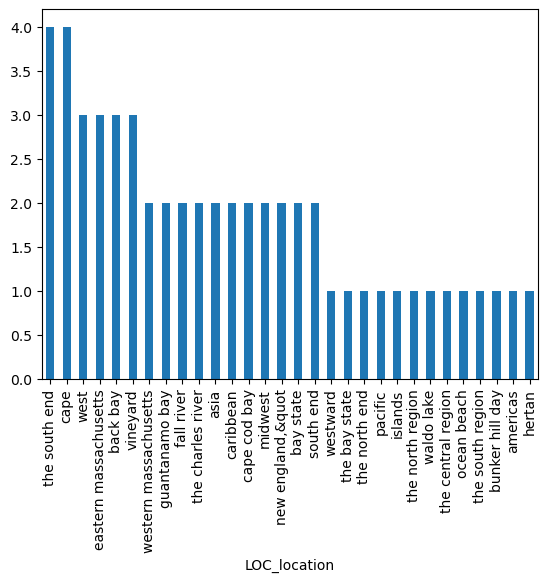

In [28]:
new_df = new_df.sort_values('LOC_count', ascending = False)

temp_new_df = new_df[(new_df['LOC_location'] != 'new england') & (new_df['LOC_location'] != 'black')]

temp_new_df[:30].plot.bar(x = 'LOC_location', y = 'LOC_count', legend=False)

<AxesSubplot:xlabel='ORG_location'>

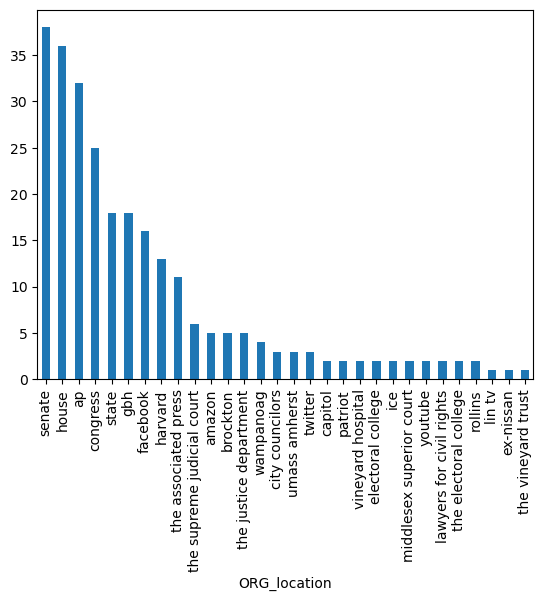

In [30]:
new_df = new_df.sort_values('ORG_count', ascending = False)

temp_new_df = new_df[(new_df['ORG_location'] != 'gbh news')]

temp_new_df[:30].plot.bar(x = 'ORG_location', y = 'ORG_count', legend=False)